In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


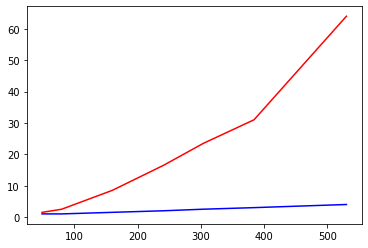

In [12]:
nodes = list(range(25, 86, 10))
edges = [49, 80, 160, 241, 304, 384, 530]
one = [0.997, 0.999, 1.501, 1.999, 2.499, 2.999, 4.000]
mult = [1.49, 2.49, 8.5, 16.49, 23.49, 31, 64]

plt.plot(edges, one, color='blue') 
plt.plot(edges, mult, color='red') 


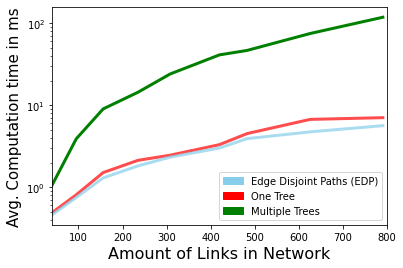

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
nodes = list(range(25, 106, 10))
edges = [40, 95, 156, 235, 308, 420, 483, 626, 791]
one = [0.49, 0.81, 1.51, 2.13, 2.46, 3.31, 4.52, 6.73, 7.06]
mult = [1.06, 3.901, 9.025, 14.41, 24.06, 41.18, 46.7, 75.09, 118.51]
edp = [0.46, 0.75, 1.3, 1.82, 2.33, 3.01, 3.92, 4.74, 5.64]

plt.plot(edges, one, color='red', linewidth=3, alpha = 0.7) 
plt.plot(edges, mult, color='green', linewidth=3) 
plt.plot(edges, edp, color='skyblue', linewidth=3, alpha = 0.7) 
plt.yscale('log') 

edp_patch = mpatches.Patch(color='skyblue', label='Edge Disjoint Paths (EDP)')
one_patch = mpatches.Patch(color='red', label='One Tree')
mult_patch = mpatches.Patch(color='green', label='Multiple Trees')

plt.legend(handles=[edp_patch, one_patch, mult_patch])
plt.xlabel('Amount of Links in Network', fontsize=16)
plt.ylabel('Avg. Computation time in ms', fontsize=15)

plt.xlim(edges[0],800)
#plt.ylim(edges[0],100)

plt.savefig('runtime.png')
plt.savefig('runtime.svg')

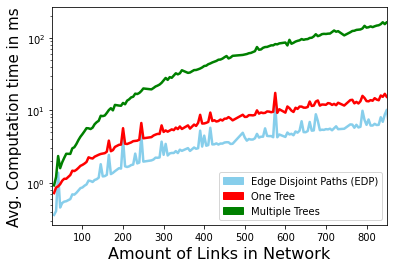

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatche
from scipy.signal import savgol_filter

def custom_round(x, base=5):
    return int(base * round(float(x)/base))

def reject_outliers(data, data2, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m], data2[s<m]

df = pd.read_csv('CSVs/runtime.csv')
df.head()

df_sorted = df.sort_values('edges')
df_sorted['edges_rounded'] = df_sorted['edges'].apply(lambda x: custom_round(x, base=5))
df_sorted.head()

df_avg = df_sorted.groupby(['edges_rounded']).mean()


plt.plot(df_avg.index, df_avg['edp'], color='skyblue', linewidth=2.5, alpha = 1) 
plt.plot(df_avg.index, df_avg['one'], color='red', linewidth=2.5, alpha = 1) 
plt.plot(df_avg.index, df_avg['mult'], color='green', linewidth=2.5, alpha = 1) 
plt.yscale('log') 

edp_patch = mpatches.Patch(color='skyblue', label='Edge Disjoint Paths (EDP)')
one_patch = mpatches.Patch(color='red', label='One Tree')
mult_patch = mpatches.Patch(color='green', label='Multiple Trees')

plt.legend(handles=[edp_patch, one_patch, mult_patch])
plt.xlabel('Amount of Links in Network', fontsize=16)
plt.ylabel('Avg. Computation time in ms', fontsize=15)

plt.xlim(25,850)

plt.savefig('runtime2.svg')

In [53]:
df_sorted.head()
df_sorted.groupby(['edges_rounded']).mean()

,nodes,edges,edp,one,mult
edges_rounded,,,,,
30,25.0,32.000000,0.362500,0.725200,0.926400
35,25.0,35.555556,0.410483,0.866667,1.207872
40,25.0,40.142857,1.384783,0.896048,2.350210
45,25.0,45.089286,0.458680,0.961387,1.599477
50,25.0,49.719298,0.529093,1.071846,1.923342
...,...,...,...,...,...
855,105.0,855.000000,6.340440,14.763300,160.071340
860,105.0,859.400000,13.104060,21.727000,168.884660
865,105.0,867.000000,6.269700,14.142100,167.619400
